In [1]:
# Goal: Predict NO2 concentration an hour in advance from meteorological and pollutant data.

In [1]:
# Import dependecies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset and confirm it's there
df = pd.read_csv("../data/AirQualityUCI.csv", sep=";", decimal=",")
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
Before doing some explanatory data analysis, we need to clean the data as we can see the tail has NaN values 

In [3]:
# Creating a copy for cleaning data and dropping all empty rows
df_drop = df.dropna(how = "all").copy()
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN


In [4]:
# Change Time format HH.MM.SS to HH:MM:SS
df_drop["Time"] = df_drop["Time"].str.replace(".", ":", regex=False)

# Create a new col by combining Date and Time (useful for time series)
df_drop["Datetime"] = pd.to_datetime(df_drop["Date"] + " " + df_drop["Time"], dayfirst=True)

# Set Datetime as index (useful for time series operations)
df_drop.set_index("Datetime", inplace=True)

display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Datetime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN


In [5]:
# Drop columns "Unamed 15" and "Unamed 16" if all entries are NaN
print(f"Before Drop: {list(df_drop.columns.values)}", end="\n\n") # Before drop

unamed_cols = ["Unnamed: 15", "Unnamed: 16"]
for col in unamed_cols:
    if df_drop[col].isna().all():
        df_drop = df_drop.drop(columns=[col])
        
print(f"After Drop: {list(df_drop.columns.values)}") # After drop

Before Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']

After Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


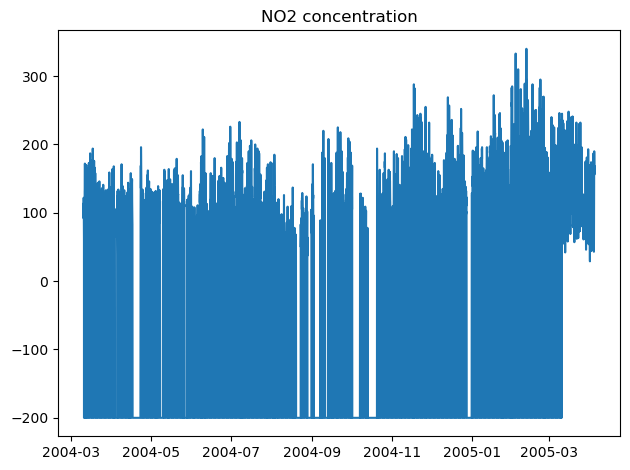

In [6]:
# simple NO2 plot to quickly check inordinary values/readings
plt.plot(df_drop["NO2(GT)"])
plt.title("NO2 concentration")
plt.tight_layout()
plt.show()

In [7]:
# Values with -200 likekly a placeholder for invalid or missing data
df_drop.replace(-200, np.nan, inplace=True)
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [8]:
# Checking how much data is missing from a given column
missing_percent = df_drop.isna().mean() * 100
missing_table = pd.DataFrame(missing_percent.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table)

,Missing Values in %
NMHC(GT),90.231912
CO(GT),17.986534
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


In [9]:
# NMHC(GT) is missing ~90% of its data, so we drop the feature (not worth salvaging)
df_drop.drop(columns=["NMHC(GT)"], inplace=True)

In [10]:
# For the remaining columns, I've decided to impute them with the median if
# the skewness is > 0.5 or < -0.5. Otherwise impute with the means
print(df_drop["NO2(GT)"].skew(), df_drop["NOx(GT)"].skew())

0.6217143134373714 1.7157807992815408


In [11]:
# Imputed remaining columns with the median
# NO2(GT), NOx(GT) and CO(GT) is missing ~17% of its data, replace NaN with median
df_drop["NO2(GT)"] = df_drop["NO2(GT)"].fillna(df_drop["NO2(GT)"].median())
df_drop["NOx(GT)"] = df_drop["NOx(GT)"].fillna(df_drop["NOx(GT)"].median())
df_drop["CO(GT)"] = df_drop["CO(GT)"].fillna(df_drop["CO(GT)"].median())

# Columns missing ~4% of its data, replace NaN with median
remaining_cols = [
    "C6H6(GT)",
    "PT08.S1(CO)",
    "PT08.S2(NMHC)",
    "PT08.S3(NOx)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)",
    "T",
    "RH",
    "AH"
]

for col in remaining_cols:
    df_drop[col] = df_drop[col].fillna(df_drop[col].median())

In [12]:
# Verifying if the data was properly cleaned and imputed
for col in df_drop.columns:
    print(f"NaN's in {col} {df_drop[col].isna().sum()}")

NaN's in Date 0
NaN's in Time 0
NaN's in CO(GT) 0
NaN's in PT08.S1(CO) 0
NaN's in C6H6(GT) 0
NaN's in PT08.S2(NMHC) 0
NaN's in NOx(GT) 0
NaN's in PT08.S3(NOx) 0
NaN's in NO2(GT) 0
NaN's in PT08.S4(NO2) 0
NaN's in PT08.S5(O3) 0
NaN's in T 0
NaN's in RH 0
NaN's in AH 0


In [13]:
# Verifying if the data was properly cleaned and imputed
missing_percent_check = df_drop.isna().mean() * 100
missing_table_check = pd.DataFrame(missing_percent_check.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table_check)

,Missing Values in %
Date,0.0
Time,0.0
CO(GT),0.0
PT08.S1(CO),0.0
C6H6(GT),0.0
PT08.S2(NMHC),0.0
NOx(GT),0.0
PT08.S3(NOx),0.0
NO2(GT),0.0
PT08.S4(NO2),0.0


In [42]:
# Created a copy of the cleaned data to avoid modifying the original by reference
D = df_drop.copy()
display(D)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


## Exploratory Data Analysis (EDA) and Feature Selection

Before we go modeling our predictive NO2 model we need to first analyse the data, it's trends and select which features will help with model training. A quick google search shows that the emissions of nitrogen dioxide (NO2) mainly comes from automotives, power plants, gas appliances, etc... With health risks ranging from coughing/wheezing to more severe cases of developing asthma and being at risk of respiratory infection when exposed to NO2 for prologue exposures. NO2 concentration also closely correlates with human activity so predicting emissions could help spread awareness and help control unregulated emissions.<br>

Since this is a time series forcasting problem, we would need to prepare our data in such a way that the models could intrepret time.

Sources:
1. https://www.epa.gov/no2-pollution
2. https://www.canada.ca/en/health-canada/services/air-quality/indoor-air-contaminants/nitrogen-dioxide.html
3. https://www.eea.europa.eu/en/analysis/publications/air-quality-status-report-2025/nitrogen-dioxide
4. https://en.wikipedia.org/wiki/NOx

In [43]:
# Exploring all features (except for date and time)
cols_to_explore = []
for col in D.columns:
    if col not in ["Date", "Time"]:
        cols_to_explore.append(col)
print(cols_to_explore)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


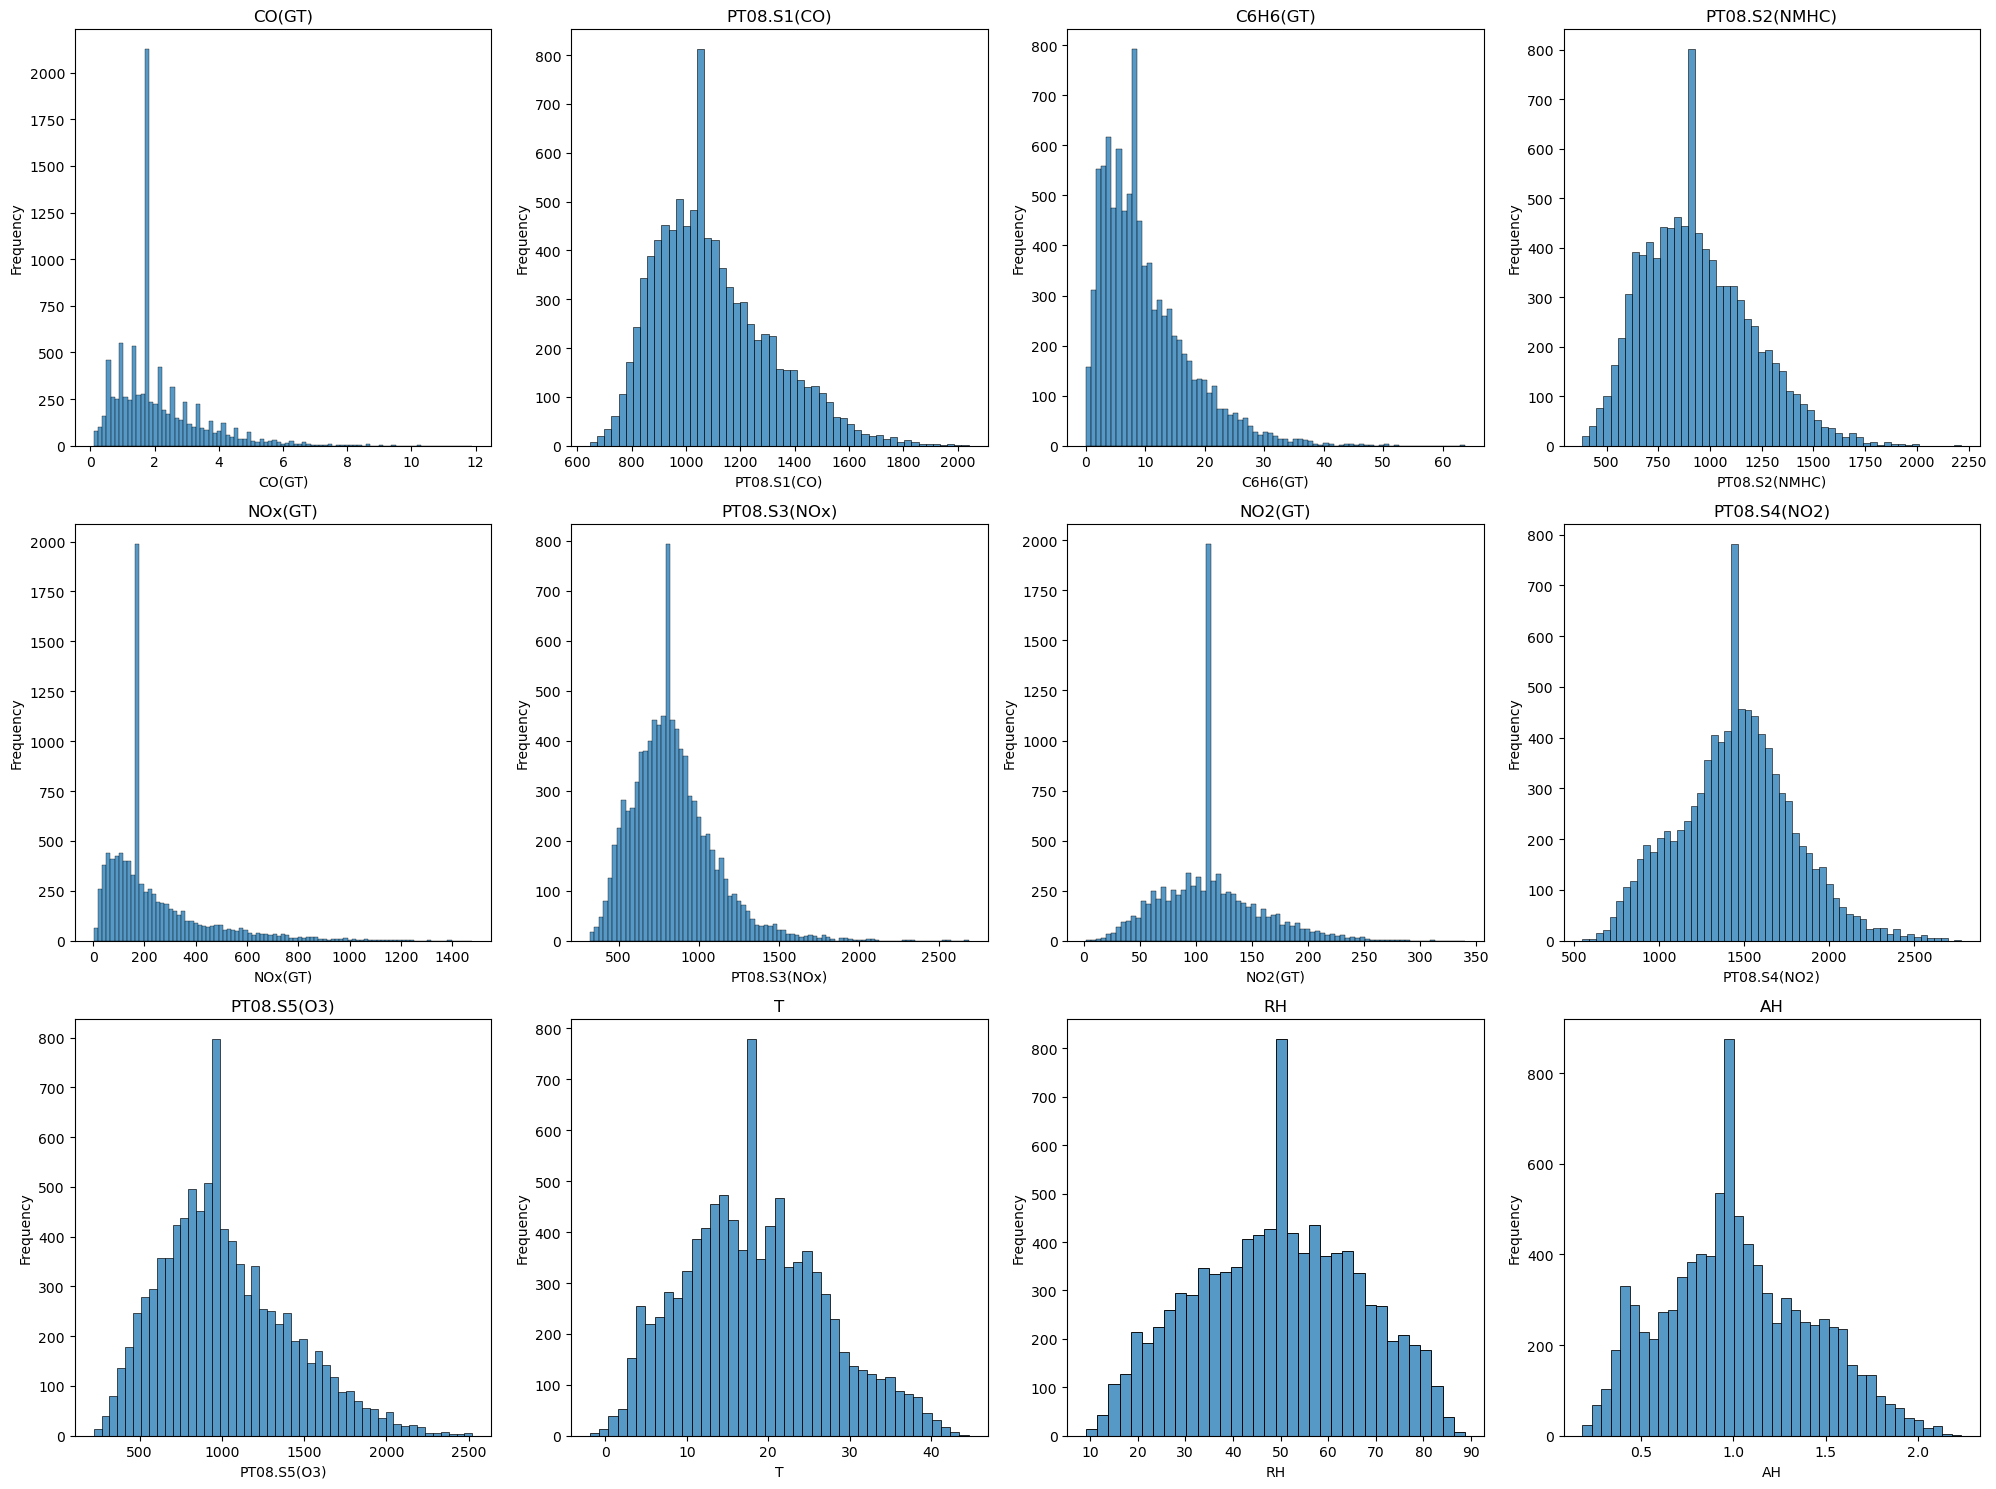

In [44]:
# Histogram
fig, axes = plt.subplots(3, 4, figsize=(20, 15)) 
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(cols_to_explore):
    sns.histplot(D[col], bins="auto", ax=axes[i]) # change y coords to D[col] to date
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Correlation Analysis
Before adding every feature into our models, I want to explore the correlations between features with NO2. A concern that might arise from this would be **multicollinearity** for linear models so we would need a way to handle them. We could either do regularization (ridge or lasso) or calculate the variance inflation factor (VIF) where VIF > 10 indicates a high multicollinearity (where we could either drop or combine it with other features)

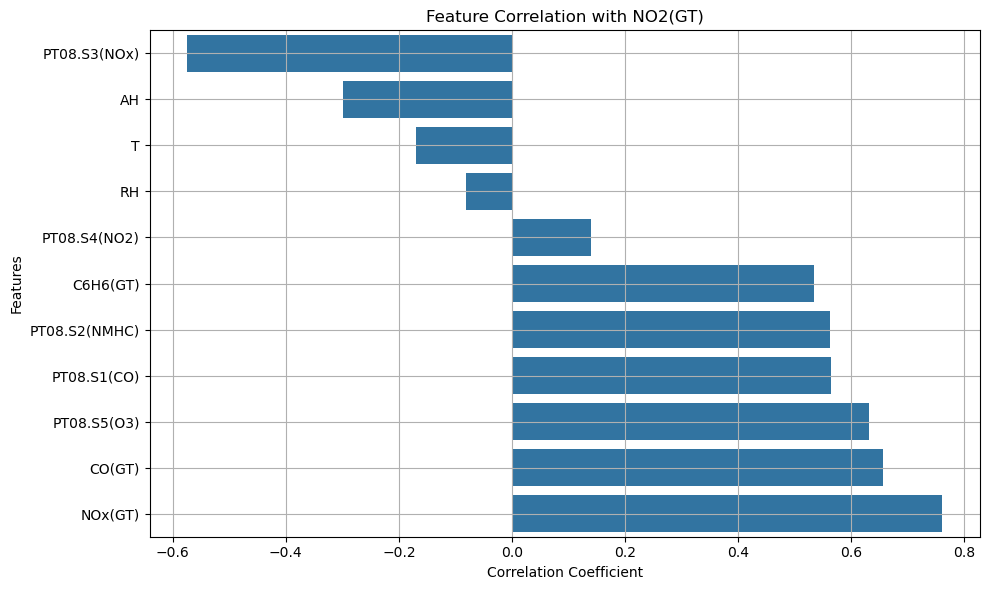

In [45]:
# Bar plot of the correlations between features and NO2(GT)
target_corr = D[cols_to_explore].corr()["NO2(GT)"].drop("NO2(GT)").sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with NO2(GT)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
corr_df = target_corr.reset_index()
corr_df.columns = ["Feature", "Correlation with NO2(GT)"]
print(corr_df.to_string(index=False))

      Feature  Correlation with NO2(GT)
 PT08.S3(NOx)                 -0.574181
           AH                 -0.298206
            T                 -0.169380
           RH                 -0.082135
 PT08.S4(NO2)                  0.139986
     C6H6(GT)                  0.533313
PT08.S2(NMHC)                  0.561938
  PT08.S1(CO)                  0.563442
  PT08.S5(O3)                  0.630425
       CO(GT)                  0.656002
      NOx(GT)                  0.760716


In [47]:
# Focusing on features with stronger correlation to NO2, corr > 0.5 to avoid over-interpreting weak/noisy associations
strong_cols_corr = [col for col in target_corr.index if round(abs(target_corr[col]), 3) > 0.5]
print(strong_cols_corr)

['PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'CO(GT)', 'NOx(GT)']


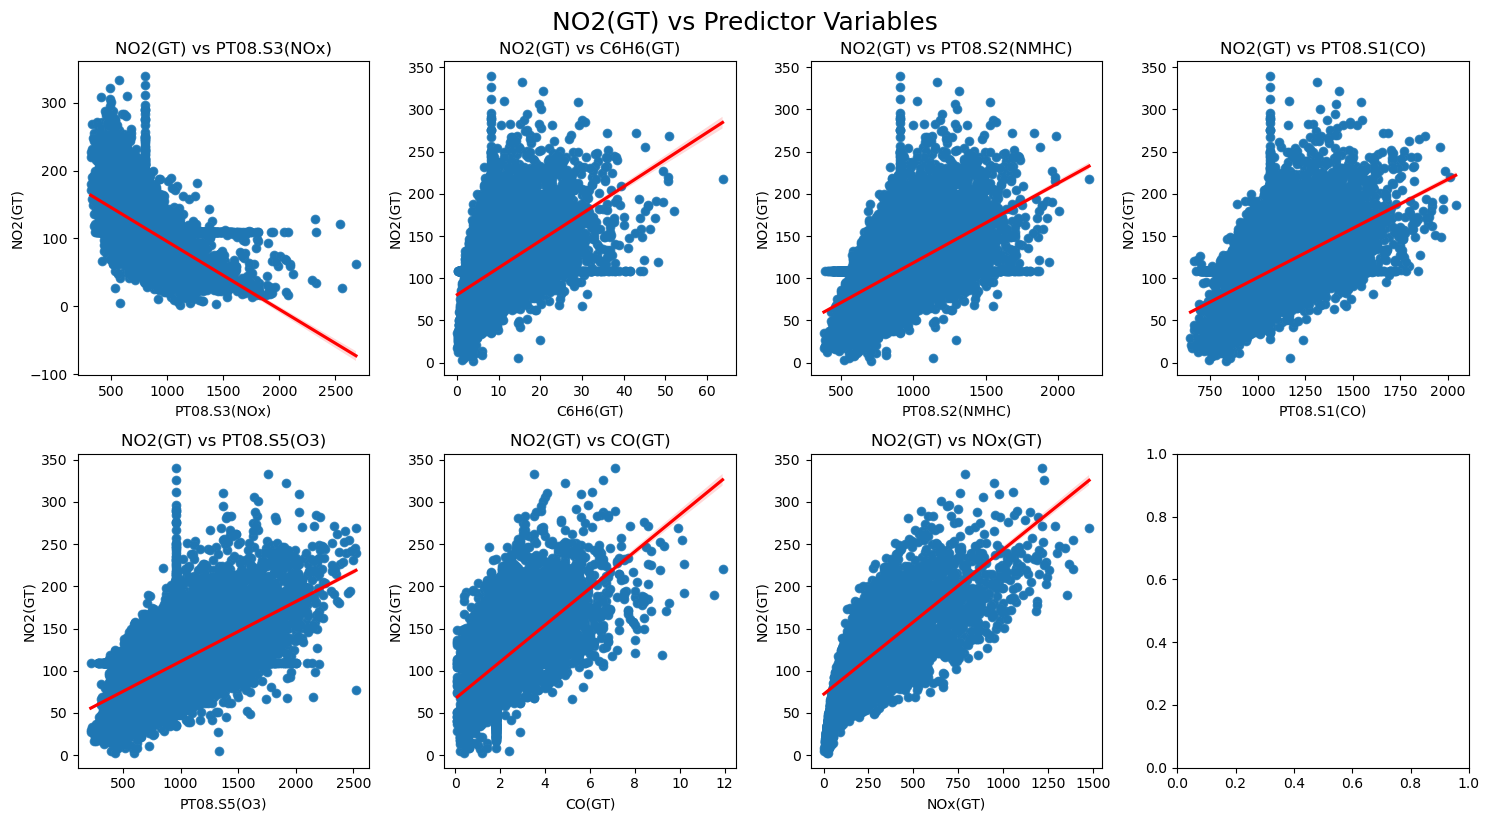

In [48]:
# Scatter plot of all strong cols corr

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(strong_cols_corr):
    # if col != "NO2(GT)":
    sns.scatterplot(data=D, x=col, y="NO2(GT)", ax=axes[i])
    sns.regplot(data=D, x=col, y="NO2(GT)", line_kws={"color":"red"}, ax=axes[i])
    axes[i].set_title(f"NO2(GT) vs {col}")

plt.tight_layout()
plt.suptitle("NO2(GT) vs Predictor Variables", fontsize=18, y=1.02)
plt.show()

### Time series analysis

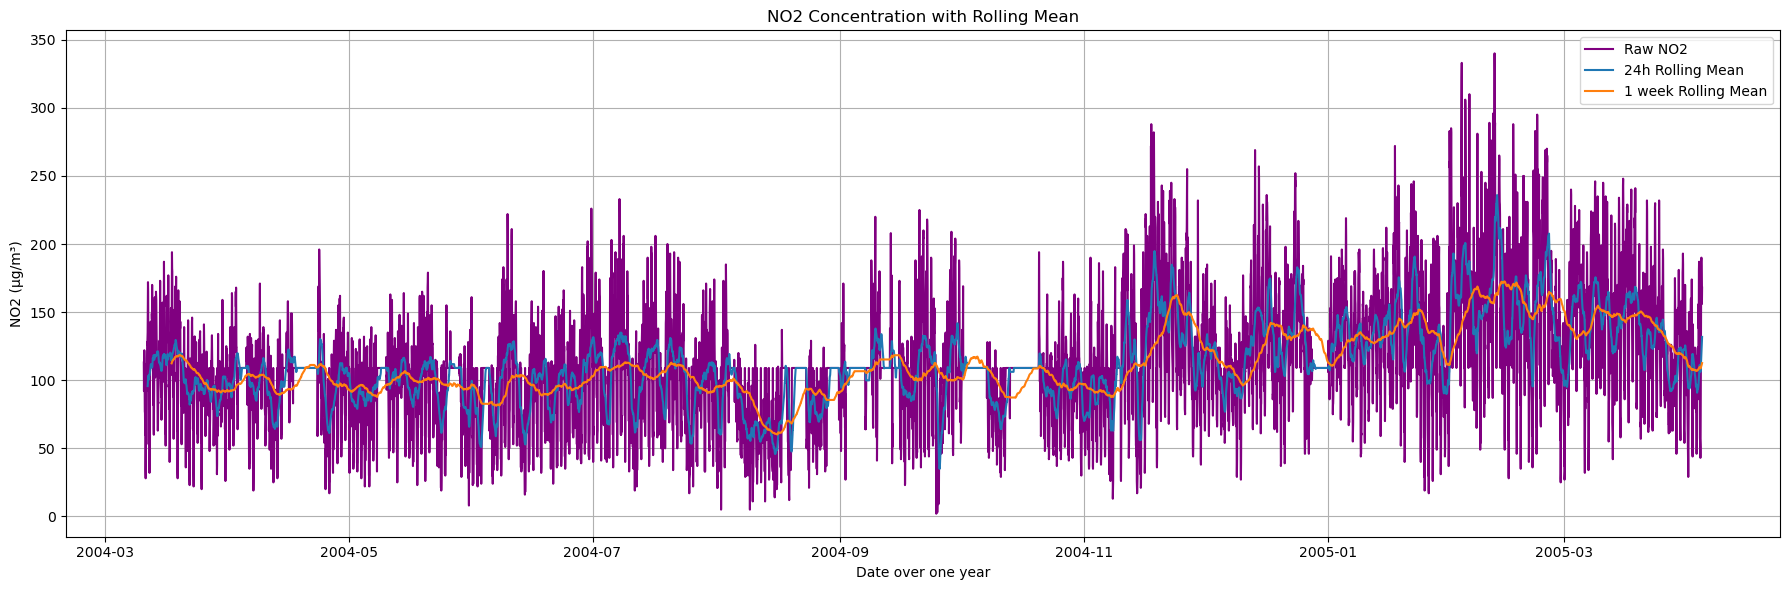

In [49]:
# Time series plot with rolling mean
NO2_rolling_mean_day = D["NO2(GT)"].rolling(window=24).mean()
NO2_rolling_mean_week = D["NO2(GT)"].rolling(window=168).mean()


plt.figure(figsize=(18, 6))
plt.plot(D.index, D["NO2(GT)"], label="Raw NO2", color="purple")
plt.plot(D.index, NO2_rolling_mean_day, label="24h Rolling Mean")
plt.plot(D.index, NO2_rolling_mean_week, label="1 week Rolling Mean")
plt.grid(True)
plt.xlabel("Date over one year")
plt.ylabel("NO2 (µg/m³)")
plt.title("NO2 Concentration with Rolling Mean")

plt.legend()
plt.tight_layout()
plt.show()

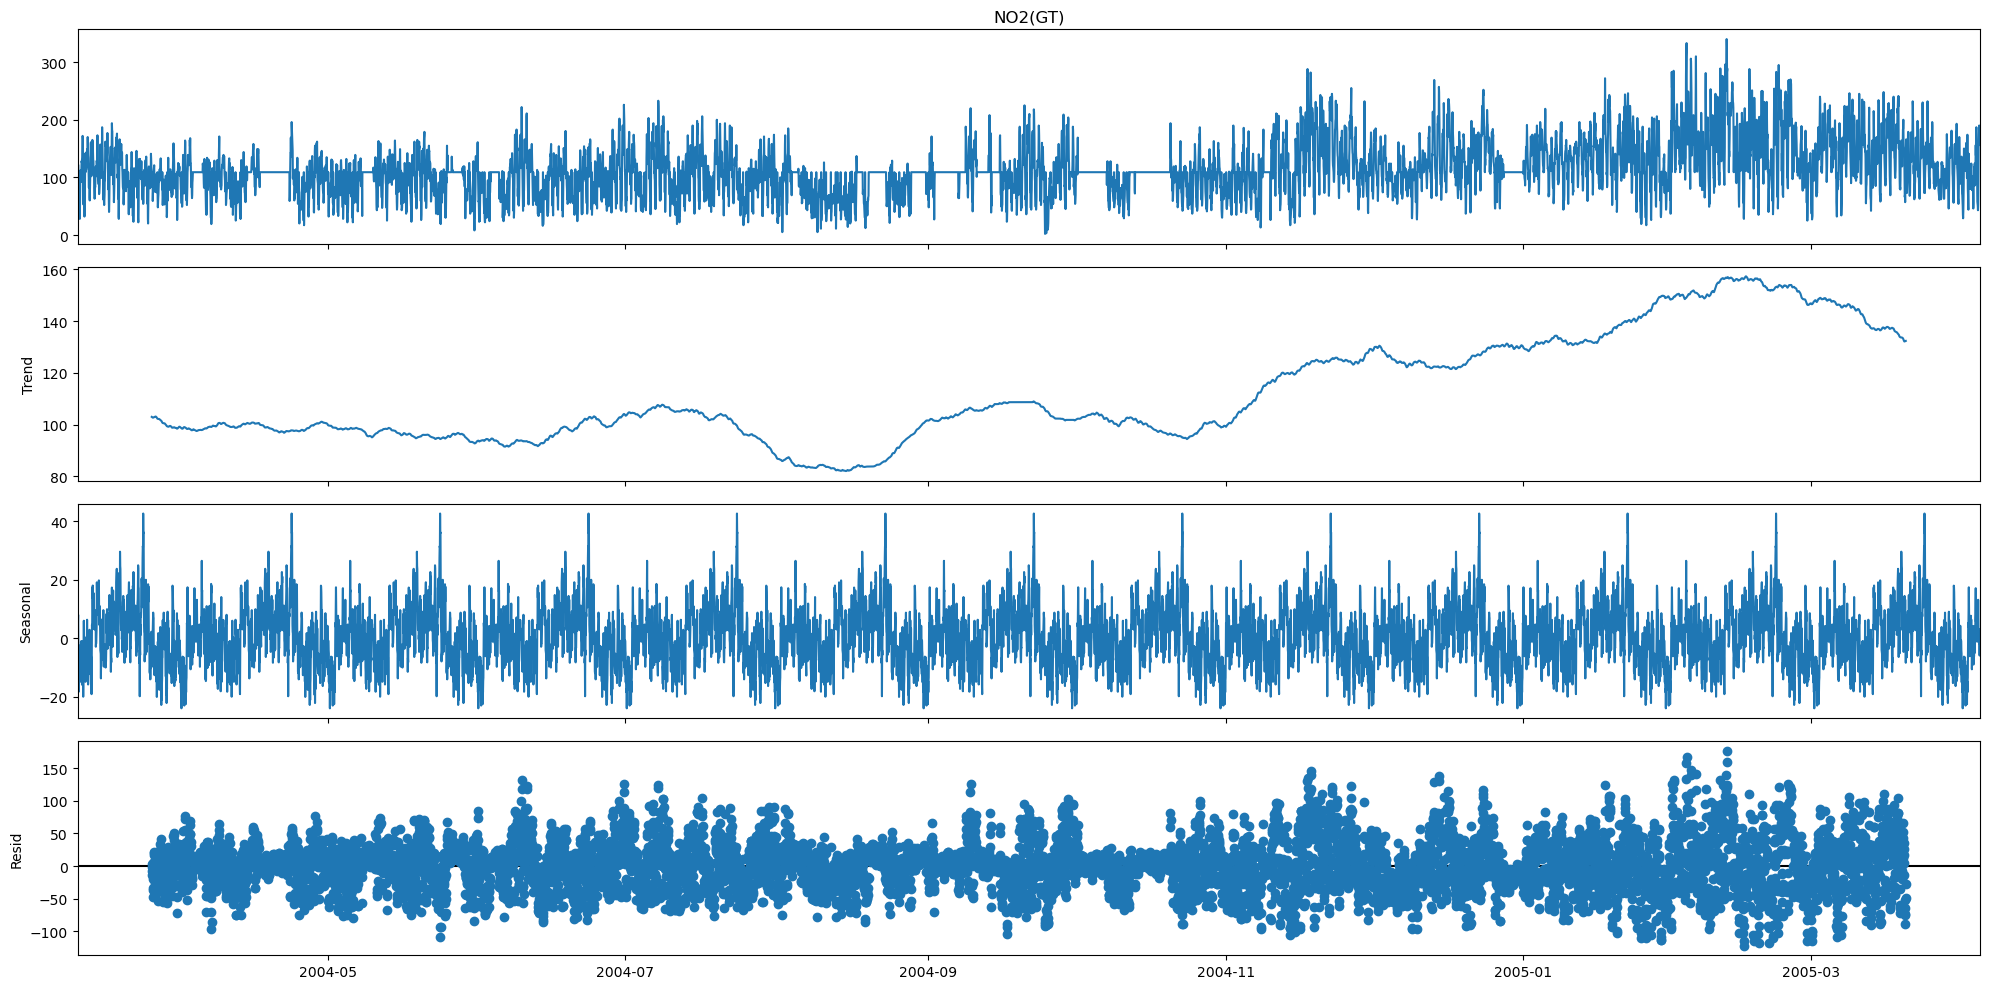

In [50]:
# Decomposing time serie to uncover trends, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(D["NO2(GT)"], model='additive', period=730)
fig = result.plot()
fig.set_size_inches(20, 10)
plt.tight_layout()
plt.show()

In [51]:
# Checking if NO2 is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(D["NO2(GT)"].dropna())  # Drop NaNs if any
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value < 0.05: The series is likely stationary.
# If p-value ≥ 0.05: The series is not stationary.

ADF Statistic: -8.087818933812665
p-value: 1.4043150355560522e-12


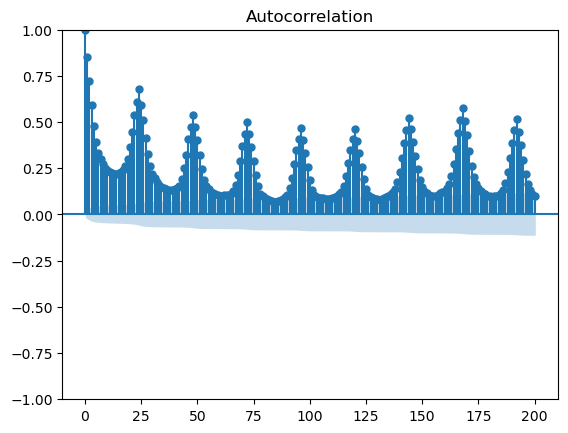

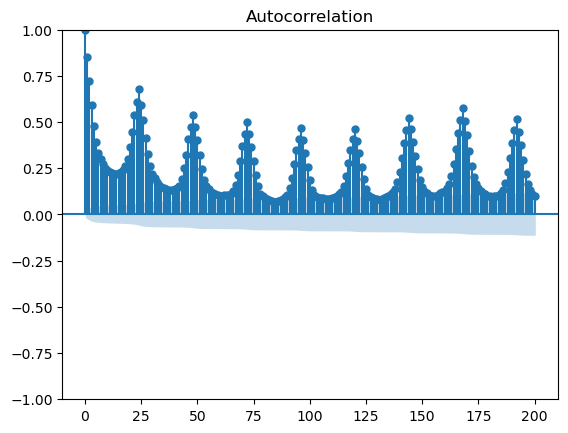

In [52]:
#######################################################################################
# ? How to intrepret
# How many Lags should we add? Use autocorrelation plots (ACF):
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D["NO2(GT)"], lags=200)

### Creating Lag Features (Feature engineering)
We're building supervised models (RF, SVR, etc..) and so we're predicting no2 at time t+1 using data from time t, t-1, t-2, ..., t-n which means we need to shift our target forward (shift(-1)), and the input backward (shift(lag))<br>

Our Target would be `NO2_t+1` which will be prediciting NO2 concentration 1h ahead. Our Lag Features, `lags_no2`, would range from 1h to 7d. We're creating lag features for NO2 to help capture autocorrelation (as NO2 are autocorrelated recent past values heavily influence the current value). We will also create lag features for correlated pollutants from our `strong_cols_corr` and add them to our dataset `D`.<br>

After creating our lag features, we create rolling windows which would help in the context of our data for our models to understand but we would need to filter VIF after scaling our linear and SVR models as they don't handle multicorrelated features well. Then we add our time based features `hour`, `dayoftheweek` and `month` in which we encode a cyclical way of encoding time in a loop. cyclical encoding of hour (captures periodicity better) alternative to one hot encoding.

In [53]:
# TARGET
D["NO2_t+1"] = D["NO2(GT)"].shift(-1) # forcasting 1h ahead

# LAG FEATURES
lags_no2 = [1, 2, 3, 6, 12, 24, 48, 168]
for lag in lags_no2:
    D[f"NO2_lag_{lag}"] = D["NO2(GT)"].shift(lag)

for col in strong_cols_corr:
    for lag in lags_no2:
        D[f"{col}_lag_{lag}"] = D[col].shift(lag)


# ROLLING WINDOWS
rolling_windows = [3, 6, 12, 24]
for window in rolling_windows:
    # NO2 roll features
    D[f"NO2_roll_mean_{window}"] = D[f"NO2(GT)"].shift(1).rolling(window).mean()
    D[f"NO2_roll_median_{window}"] = D[f"NO2(GT)"].shift(1).rolling(window).median()
    D[f"NO2_roll_std_{window}"] = D[f"NO2(GT)"].shift(1).rolling(window).std()
    D[f"NO2_diff_{window}"] = D["NO2(GT)"].shift(1) - D["NO2(GT)"].shift(window)

    # Pollutants roll features
    for col in strong_cols_corr:
        D[f"{col}_roll_mean_{window}"] = D[col].shift(1).rolling(window).mean()
        D[f"{col}_roll_median_{window}"] = D[col].shift(1).rolling(window).median()
        D[f"{col}_roll_std_{window}"] = D[col].shift(1).rolling(window).std()
        D[f"{col}_diff_{window}"] = D[col].shift(1) - D[col].shift(window)

# rolling_windows = [3, 6, 12, 24]
# rolling_features = []

# print(f"Data shape before rolling features: {D.shape}")
# # Generate rolling features for NO2(GT) ####
# for window in rolling_windows:
#     roll_mean = D["NO2(GT)"].shift(1).rolling(window).mean()
#     roll_std = D["NO2(GT)"].shift(1).rolling(window).std()
#     roll_median = D["NO2(GT)"].shift(1).rolling(window).median()
#     diff = D["NO2(GT)"].shift(1) - D["NO2(GT)"].shift(window)

#     roll_mean.name = f"NO2_roll_mean_{window}"
#     roll_median.name = f"NO2_roll_median_{window}"
#     roll_std.name = f"NO2_roll_std_{window}"
#     diff.name = f"NO2_diff_{window}"

#     rolling_features.extend([roll_mean, roll_std, roll_median, diff])
# ####

# for col in strong_cols_corr:
#     for window in rolling_windows:
#         roll_mean = D[col].shift(1).rolling(window).mean()
#         roll_std = D[col].shift(1).rolling(window).std()
#         diff = D[col].shift(1) - D[col].shift(window)

#         roll_mean.name = f"{col}_roll_mean_{window}"
#         roll_std.name = f"{col}_roll_std_{window}"
#         diff.name = f"{col}_diff_{window}"

#         rolling_features.extend([roll_mean, roll_std, diff])

# # Concatenate all at once
# D = pd.concat([D] + rolling_features, axis=1)


# TIME FEATURES
D["hour"] = D.index.hour
D["dayofweek"] = D.index.dayofweek
D["month"] = D.index.month

# CYCLICAL ENCODING
D["hour_sin"] = np.sin(2 * np.pi * D["hour"] / 24)
D["hour_cos"] = np.cos(2 * np.pi * D["hour"] / 24)

D["day_sin"] = np.sin(2 * np.pi * D["dayofweek"] / 7)
D["day_cos"] = np.cos(2 * np.pi * D["dayofweek"] / 7)

print(f"Data shape before dropna: {D.shape}")
# Drops all NaN from shifting
D = D.dropna()
print(f"Data shape after dropna: {D.shape}")

Data shape before dropna: (9357, 214)
Data shape after dropna: (9188, 214)


C:\Users\322jl\AppData\Local\Temp\ipykernel_51488\838918878.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  D[f"NO2_roll_median_{window}"] = D[f"NO2(GT)"].shift(1).rolling(window).median()
C:\Users\322jl\AppData\Local\Temp\ipykernel_51488\838918878.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  D[f"NO2_roll_std_{window}"] = D[f"NO2(GT)"].shift(1).rolling(window).std()
C:\Users\322jl\AppData\Local\Temp\ipykernel_51488\838918878.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

In [54]:
# Verifying if the data has any NaN values
nan_found = False
for col in D.columns:
    if D[col].isna().sum() != 0:
        print(f"NaN Value found in {col}")
        nan_found = True

if not nan_found:
    print("No NaN was found")

No NaN was found


### Train-Test Split

In [55]:
# One Year data, train on 2004 and test on 2005 (couple months in 2025)
train = D[:"2004-12-31"]
test = D["2005-01-01":]

X_train_full, y_train_full = train.drop(columns=["NO2_t+1"]), train["NO2_t+1"]
X_test_full, y_test_full = test.drop(columns=["NO2_t+1"]), test["NO2_t+1"]

### VIF Filtering

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler

# LINEAR AND SVR MODELS
def vif_filter(X, thresh=10.0):
    X_num = X.select_dtypes(include=["number"]).dropna()
    X_const = add_constant(X_num)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    vif_data = vif_data[vif_data["feature"] != "const"]
    return vif_data[vif_data["VIF"] < thresh]["feature"].tolist()

# Applying VIF filtering
linear_features = vif_filter(X_train_full)
X_train = X_train_full[linear_features]
X_test = X_test_full[linear_features]

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TREE MODELS
X_train_tree = X_train_full.select_dtypes(include=["number"]).copy()
X_test_tree = X_test_tree  = X_test_full.select_dtypes(include=["number"]).copy()

c:\Users\322jl\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# def get_low_vif_features(X, thresh=10.0):
#     """
#     Filters features in X by removing those with VIF above the threshold.

#     Parameters:
#     -----------
#     X : pd.DataFrame
#         DataFrame containing input features only (no target).
#     thresh : float
#         VIF threshold (default = 10.0)

#     Returns:
#     --------
#     filtered_features : list of str
#         Feature names with VIF < threshold.
#     vif_df : pd.DataFrame
#         Full VIF report including dropped features.
#     """
#     # Drop non-numeric columns
#     X = X.select_dtypes(include=["number"]).dropna().copy()
#     X_with_const = add_constant(X)

#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X_with_const.columns
#     vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

#     # Remove constant/intercept
#     vif_data = vif_data[vif_data["feature"] != "const"]

#     # Filtered features
#     filtered = vif_data[vif_data["VIF"] < thresh]
#     filtered_features = filtered["feature"].tolist()

#     return filtered_features, vif_data


# all_input_features = [col for col in D.columns if col != "NO2_t+1"]

# # Step 1: Get VIF-filtered features
# filtered_features_cols, vif_report = get_low_vif_features(D[all_input_features])

# # Step 2: Prepare X and y
# X = D[filtered_features_cols]
# y = D["NO2_t+1"]

c:\Users\322jl\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Model Selection

In [ ]:
# TESTING
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler # Linear and SVR models
# # Defining my features and target
# # X = D[filtered_features_cols] # Features
# # y = D["NO2_t+1"] # Target

# # Time-aware train/test split
# train = D[:"2004-12-31"]
# test = D["2005-01-01":]

# X_train, X_test = train[filtered_features_cols], test[filtered_features_cols]
# y_train, y_test = train["NO2_t+1"], test["NO2_t+1"]

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [57]:
# Linear Regression (Baseline Model)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler # Linear and SVR models

# Fitting Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_full)

# Model Prediction
lr_y_predict = lr_model.predict(X_test_scaled)

# Evaluate Model
mse = mean_squared_error(y_test_full, lr_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_full, lr_y_predict)
r2 = r2_score(y_test_full, lr_y_predict)

print(f"Linear Regression Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Most Recent:
# Linear Regression Results:
# MAE:  35.31
# RMSE: 47.19
# R²:   0.1329

Linear Regression Results:
MAE:  35.31
RMSE: 47.19
R²:   0.1329


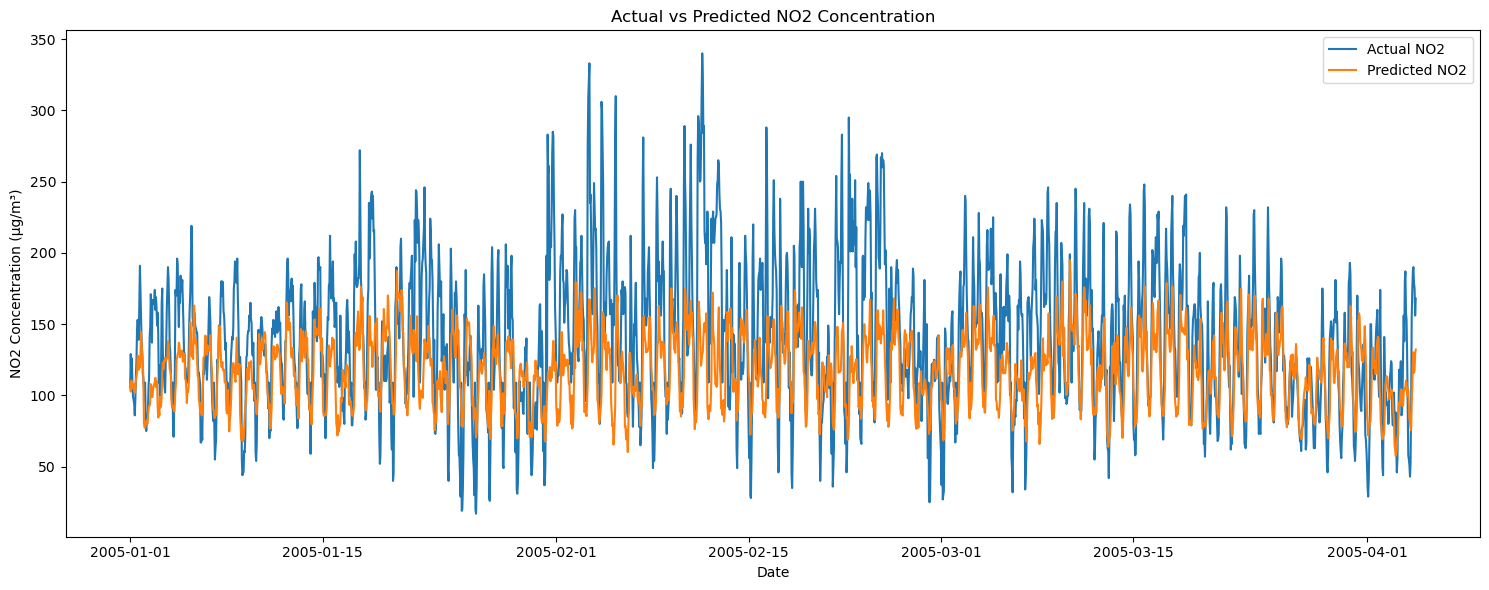

In [30]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test_full.index, y_test_full, label="Actual NO2")
# Predicted NO2
plt.plot(y_test_full.index, lr_y_predict, label="Predicted NO2")

plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "svr__C": [1, 10, 100],
    "svr__gamma": ['scale', 0.01, 0.1],
    "svr__epsilon": [0.01, 0.1, 0.5]
}

# Create pipeline
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Grid search
grid = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train_full)

# Best model found
print("Best parameters:", grid.best_params_)

# Predict with the best model
svr_y_predict = grid.predict(X_test_scaled)

# Evaluate Model
mse = mean_squared_error(y_test_full, svr_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_full, svr_y_predict)
r2 = r2_score(y_test_full, svr_y_predict)

print(f"SVR Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Best parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
# SVR Results:
# MAE:  34.80
# RMSE: 46.17
# R²:   0.1699

Best parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
SVR Results:
MAE:  34.80
RMSE: 46.17
R²:   0.1699


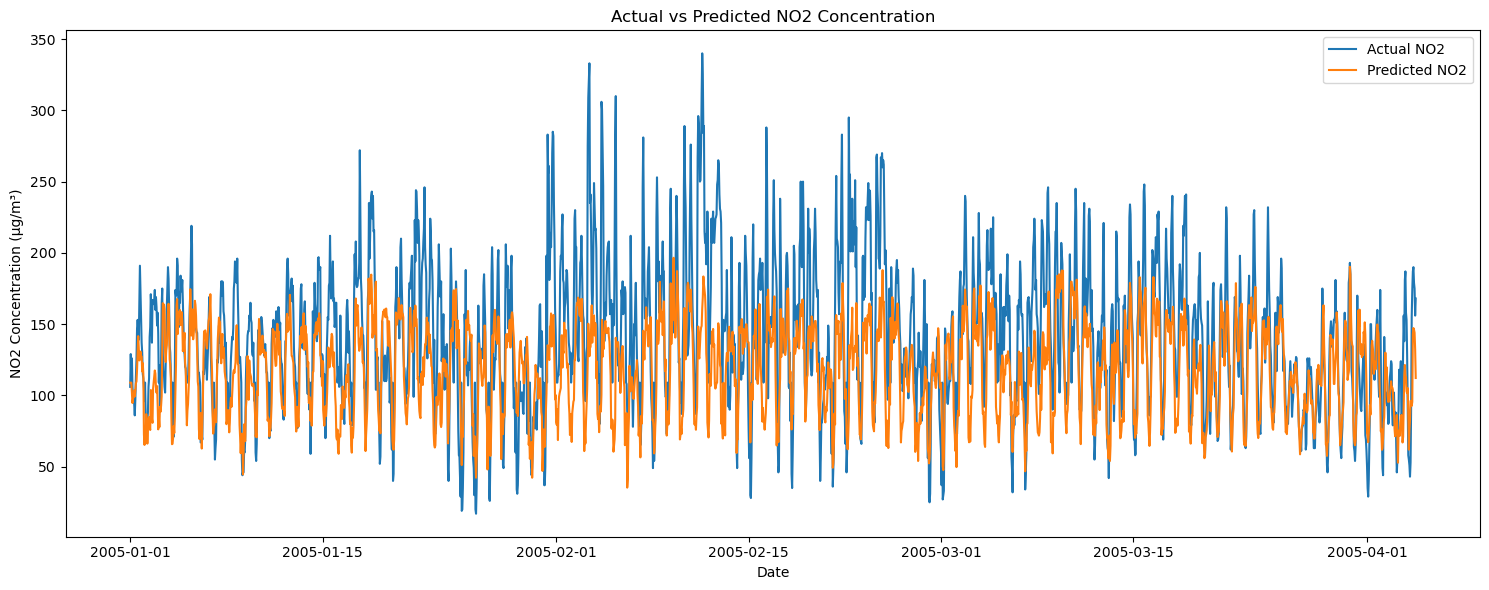

In [32]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test_full.index, y_test_full, label="Actual NO2")
# Predicted NO2
plt.plot(y_test_full.index, svr_y_predict, label="Predicted NO2")

plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#### IN TESTING
# Generate rolling features for NO2(GT)
for window in rolling_windows:
    roll_mean = D["NO2(GT)"].shift(1).rolling(window).mean()
    roll_std = D["NO2(GT)"].shift(1).rolling(window).std()
    diff = D["NO2(GT)"].shift(1) - D["NO2(GT)"].shift(window)

    roll_mean.name = f"NO2_roll_mean_{window}"
    roll_std.name = f"NO2_roll_std_{window}"
    diff.name = f"NO2_diff_{window}"

    rolling_features.extend([roll_mean, roll_std, diff])
####
missing = [feat for feat in rf_features_all if feat not in D.columns]
if missing:
    print("Missing features:", missing)


Missing features: ['NO2_roll_mean_3', 'NO2_roll_std_3', 'NO2_diff_3', 'NO2_roll_mean_6', 'NO2_roll_std_6', 'NO2_diff_6', 'NO2_roll_mean_12', 'NO2_roll_std_12', 'NO2_diff_12', 'NO2_roll_mean_24', 'NO2_roll_std_24', 'NO2_diff_24']


In [ ]:
# # NOT IN USE ANYMORE
# no2_lags = [f"NO2_lag_{lag}" for lag in lags_no2]
# rf_features = []

# # Start with lag features of strongly correlated variables
# for col in strong_cols_corr:
#     for lag in lags_no2:
#         rf_features.append(f"{col}_lag_{lag}")

# # Add NO2 lags too
# rf_features += no2_lags

# # Optionally add time features (for tree models this can help)
# rf_features += ["hour", "dayofweek", "month", "hour_sin", "hour_cos", "day_sin", "day_cos"]
# print(rf_features)

['PT08.S3(NOx)_lag_1', 'PT08.S3(NOx)_lag_2', 'PT08.S3(NOx)_lag_3', 'PT08.S3(NOx)_lag_6', 'PT08.S3(NOx)_lag_12', 'PT08.S3(NOx)_lag_24', 'PT08.S3(NOx)_lag_48', 'PT08.S3(NOx)_lag_168', 'C6H6(GT)_lag_1', 'C6H6(GT)_lag_2', 'C6H6(GT)_lag_3', 'C6H6(GT)_lag_6', 'C6H6(GT)_lag_12', 'C6H6(GT)_lag_24', 'C6H6(GT)_lag_48', 'C6H6(GT)_lag_168', 'PT08.S2(NMHC)_lag_1', 'PT08.S2(NMHC)_lag_2', 'PT08.S2(NMHC)_lag_3', 'PT08.S2(NMHC)_lag_6', 'PT08.S2(NMHC)_lag_12', 'PT08.S2(NMHC)_lag_24', 'PT08.S2(NMHC)_lag_48', 'PT08.S2(NMHC)_lag_168', 'PT08.S1(CO)_lag_1', 'PT08.S1(CO)_lag_2', 'PT08.S1(CO)_lag_3', 'PT08.S1(CO)_lag_6', 'PT08.S1(CO)_lag_12', 'PT08.S1(CO)_lag_24', 'PT08.S1(CO)_lag_48', 'PT08.S1(CO)_lag_168', 'PT08.S5(O3)_lag_1', 'PT08.S5(O3)_lag_2', 'PT08.S5(O3)_lag_3', 'PT08.S5(O3)_lag_6', 'PT08.S5(O3)_lag_12', 'PT08.S5(O3)_lag_24', 'PT08.S5(O3)_lag_48', 'PT08.S5(O3)_lag_168', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3', 'CO(GT)_lag_6', 'CO(GT)_lag_12', 'CO(GT)_lag_24', 'CO(GT)_lag_48', 'CO(GT)_lag_168', '

In [ ]:
# # NOT IN USE ANYMORE
# # Features to use
# # Initialize empty list
# rf_features_all = []

# # Add lag features for NO2
# for lag in lags_no2:
#     rf_features_all.append(f"NO2_lag_{lag}")

# # Add rolling features for NO2
# for window in rolling_windows:
#     rf_features_all += [f"NO2_roll_mean_{window}", f"NO2_roll_std_{window}", f"NO2_diff_{window}", f"NO2_roll_median_{window}"]

# # Add lag features for other correlated columns
# for col in strong_cols_corr:
#     for lag in lags_no2:
#         rf_features_all.append(f"{col}_lag_{lag}")

# # Add rolling features for other correlated columns
# for col in strong_cols_corr:
#     for window in rolling_windows:
#         rf_features_all += [f"{col}_roll_mean_{window}", f"{col}_roll_std_{window}", f"{col}_diff_{window}"]

# # Add time-based features
# time_features_list = ["hour", "dayofweek", "month", "hour_sin", "hour_cos", "day_sin", "day_cos"]
# rf_features_all += time_features_list

In [60]:
# Random Forest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Fitting Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_tree, y_train_full)

# Model Prediction
rf_y_predict = rf_model.predict(X_test_tree)

from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# param_grid = {
#     "n_estimators": [100],
#     "max_depth": [None, 10],
#     "min_samples_split": [2],
#     "min_samples_leaf": [1]
# }


# rf = RandomForestRegressor(random_state=42)
# grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# grid.fit(X_train_tree, y_train_full)

# print("Best parameters:", grid.best_params_)
# rf_model = grid.best_estimator_

# rf_y_predict = rf_model.predict(X_test_tree)

# Use the best params from GridSearch
best_params = {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train_tree, y_train_full)

rf_y_predict = rf_best.predict(X_test_tree)

# Evaluate Model
mse = mean_squared_error(y_test_full, rf_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_full, rf_y_predict)
r2 = r2_score(y_test_full, rf_y_predict)

print(f"Random Forest Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# MOST RECENT
# R²: 0.7651 model explains ~76.5% of the variance in NO2 levels
# Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Random Forest Results:
# MAE:  17.41
# RMSE: 24.56
# R²:   0.7651

# rf_features
# Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# Random Forest Results:
# MAE:  23.17
# RMSE: 31.58
# R²:   0.6119

# Recent
# Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# Random Forest Results:
# MAE:  17.23
# RMSE: 24.31
# R²:   0.7698

Random Forest Results:
MAE:  17.22
RMSE: 24.33
R²:   0.7694


In [61]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Permutation importance
result = permutation_importance(rf_best, X_test_tree, y_test_full, 
                                n_repeats=10, random_state=42, n_jobs=-1)

importances = result.importances_mean

# Choosing a threshold
selected_features = X_train_tree.columns[importances > 0.001]

print("Selected features:", list(selected_features))

# Reduce datasets
X_train_tree_reduced = X_train_tree[selected_features]
X_test_tree_reduced  = X_test_tree[selected_features]

# Retrain RF on reduced set
rf_reduced = RandomForestRegressor(random_state=42, 
                                   n_estimators=rf_best.n_estimators,
                                   max_depth=rf_best.max_depth,
                                   min_samples_split=rf_best.min_samples_split,
                                   min_samples_leaf=rf_best.min_samples_leaf,
                                   max_features=rf_best.max_features)
rf_reduced.fit(X_train_tree_reduced, y_train_full)

rf_y_predict_reduced = rf_reduced.predict(X_test_tree_reduced)

# Evaluate Model
mse = mean_squared_error(y_test_full, rf_y_predict_reduced)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_full, rf_y_predict_reduced)
r2 = r2_score(y_test_full, rf_y_predict_reduced)

print(f"Reduced Random Forest Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Selected features: ['NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'NO2_lag_1', 'NO2_lag_48', 'NO2_roll_std_12', 'NO2_diff_12', 'NO2_roll_mean_24', 'hour', 'hour_sin', 'hour_cos']
Reduced Random Forest Results:
MAE:  16.60
RMSE: 23.08
R²:   0.7926


In [ ]:
# Recent
# Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# Random Forest Results:
# MAE:  17.23
# RMSE: 24.31
# R²:   0.7698

# [importances > 0]
# Selected features: ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'NO2_lag_1', 'NO2_lag_2', 'NO2_lag_3', 'NO2_lag_12', 'NO2_lag_24', 'NO2_lag_48', 'NO2_lag_168', 'PT08.S3(NOx)_lag_2', 'PT08.S3(NOx)_lag_3', 'PT08.S3(NOx)_lag_6', 'PT08.S3(NOx)_lag_24', 'PT08.S3(NOx)_lag_48', 'C6H6(GT)_lag_1', 'C6H6(GT)_lag_2', 'C6H6(GT)_lag_3', 'C6H6(GT)_lag_12', 'C6H6(GT)_lag_24', 'C6H6(GT)_lag_48', 'C6H6(GT)_lag_168', 'PT08.S2(NMHC)_lag_1', 'PT08.S2(NMHC)_lag_2', 'PT08.S2(NMHC)_lag_3', 'PT08.S2(NMHC)_lag_6', 'PT08.S2(NMHC)_lag_12', 'PT08.S2(NMHC)_lag_48', 'PT08.S2(NMHC)_lag_168', 'PT08.S1(CO)_lag_2', 'PT08.S1(CO)_lag_3', 'PT08.S1(CO)_lag_6', 'PT08.S1(CO)_lag_48', 'PT08.S1(CO)_lag_168', 'PT08.S5(O3)_lag_48', 'PT08.S5(O3)_lag_168', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3', 'CO(GT)_lag_12', 'CO(GT)_lag_48', 'CO(GT)_lag_168', 'NOx(GT)_lag_1', 'NOx(GT)_lag_2', 'NOx(GT)_lag_12', 'NOx(GT)_lag_24', 'NOx(GT)_lag_48', 'NOx(GT)_lag_168', 'NO2_roll_mean_3', 'NO2_roll_std_3', 'PT08.S3(NOx)_roll_mean_3', 'PT08.S3(NOx)_diff_3', 'C6H6(GT)_roll_mean_3', 'C6H6(GT)_roll_std_3', 'C6H6(GT)_diff_3', 'PT08.S2(NMHC)_roll_mean_3', 'PT08.S2(NMHC)_roll_std_3', 'PT08.S1(CO)_roll_mean_3', 'PT08.S1(CO)_roll_std_3', 'PT08.S1(CO)_diff_3', 'PT08.S5(O3)_roll_mean_3', 'PT08.S5(O3)_diff_3', 'CO(GT)_roll_std_3', 'NOx(GT)_roll_mean_3', 'NOx(GT)_roll_std_3', 'NOx(GT)_diff_3', 'NO2_roll_mean_6', 'PT08.S3(NOx)_diff_6', 'C6H6(GT)_roll_mean_6', 'C6H6(GT)_roll_std_6', 'PT08.S2(NMHC)_roll_mean_6', 'PT08.S2(NMHC)_roll_std_6', 'PT08.S2(NMHC)_diff_6', 'PT08.S1(CO)_roll_mean_6', 'PT08.S1(CO)_roll_std_6', 'PT08.S5(O3)_roll_std_6', 'PT08.S5(O3)_diff_6', 'CO(GT)_roll_mean_6', 'CO(GT)_roll_std_6', 'NO2_roll_mean_12', 'NO2_roll_std_12', 'NO2_diff_12', 'PT08.S3(NOx)_roll_mean_12', 'PT08.S3(NOx)_roll_std_12', 'PT08.S3(NOx)_diff_12', 'C6H6(GT)_roll_mean_12', 'C6H6(GT)_roll_std_12', 'C6H6(GT)_diff_12', 'PT08.S2(NMHC)_roll_std_12', 'PT08.S2(NMHC)_diff_12', 'PT08.S5(O3)_roll_std_12', 'CO(GT)_diff_12', 'NOx(GT)_roll_std_12', 'NOx(GT)_diff_12', 'NO2_roll_mean_24', 'NO2_roll_std_24', 'PT08.S3(NOx)_roll_mean_24', 'C6H6(GT)_roll_mean_24', 'C6H6(GT)_roll_std_24', 'PT08.S2(NMHC)_diff_24', 'PT08.S1(CO)_diff_24', 'PT08.S5(O3)_roll_mean_24', 'PT08.S5(O3)_roll_std_24', 'PT08.S5(O3)_diff_24', 'CO(GT)_roll_std_24', 'NOx(GT)_roll_mean_24', 'hour', 'dayofweek', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']
# Reduced Random Forest Results:
# MAE:  16.69
# RMSE: 23.51
# R²:   0.7848

# [importances > 0.001]
# Selected features: ['NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'NO2_lag_1', 'NO2_lag_48', 'NO2_roll_std_12', 'NO2_diff_12', 'NO2_roll_mean_24', 'hour', 'hour_sin', 'hour_cos']
# Reduced Random Forest Results:
# MAE:  16.59
# RMSE: 23.06
# R²:   0.7929

# [importances > 0.005]
# Selected features: ['NO2(GT)', 'hour', 'hour_sin', 'hour_cos']
# Reduced Feature RF:
# R2: 0.755330176080157
# MAE: 18.245643347815548
# RMSE: 25.06677158393499

### Feature Selection

In [ ]:
# Recursive Feature Elimination (RFE) vs Permutation Feature Importance (PFI)
# https://medium.com/@tzhaonj/feature-selection-in-machine-learning-recursive-feature-elimination-vs-235faddc1604

In [39]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_best, X_test_tree, y_test_full, n_repeats=10, random_state=42)
importances = result.importances_mean

# selected_features = X_train_tree.columns[importances > 0.01]
# X_train_tree_reduced, X_test_tree_reduced = X_train_tree[selected_features], X_test_tree[selected_features]
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_train_tree.columns[i]}: {result.importances_mean[i]:.4f}")

NO2(GT): 1.2183
hour_cos: 0.0426
hour: 0.0137
hour_sin: 0.0056
NO2_lag_1: 0.0037
NO2_roll_std_12: 0.0037
NOx(GT): 0.0035
NO2_diff_12: 0.0031
NO2_lag_48: 0.0026
NO2_roll_mean_24: 0.0022
PT08.S4(NO2): 0.0014
T: 0.0012
NO2_roll_mean_12: 0.0009
PT08.S3(NOx): 0.0009
NOx(GT)_lag_48: 0.0009
NO2_lag_12: 0.0008
C6H6(GT): 0.0008
NOx(GT)_lag_1: 0.0007
NO2_lag_3: 0.0007
PT08.S1(CO): 0.0007
PT08.S5(O3): 0.0007
NOx(GT)_diff_12: 0.0007
PT08.S2(NMHC)_lag_2: 0.0006
NOx(GT)_diff_3: 0.0006
CO(GT)_diff_12: 0.0006
NO2_roll_std_24: 0.0006
NO2_roll_mean_3: 0.0006
NOx(GT)_lag_168: 0.0005
PT08.S2(NMHC)_roll_std_6: 0.0005
C6H6(GT)_lag_48: 0.0005
NO2_roll_std_3: 0.0005
C6H6(GT)_lag_2: 0.0005
NOx(GT)_roll_std_3: 0.0005
NOx(GT)_lag_12: 0.0004
PT08.S3(NOx)_diff_12: 0.0004
PT08.S3(NOx)_diff_3: 0.0004
CO(GT)_lag_1: 0.0004
C6H6(GT)_lag_1: 0.0004
PT08.S2(NMHC)_lag_3: 0.0003
NOx(GT)_roll_std_12: 0.0003
PT08.S2(NMHC): 0.0003
PT08.S2(NMHC)_lag_1: 0.0003
NO2_lag_24: 0.0003
CO(GT)_lag_3: 0.0003
NOx(GT)_lag_24: 0.0003
AH: 0.

In [ ]:
# LightGBM Results:
# MAE:  16.80
# RMSE: 23.54
# R²:   0.7842

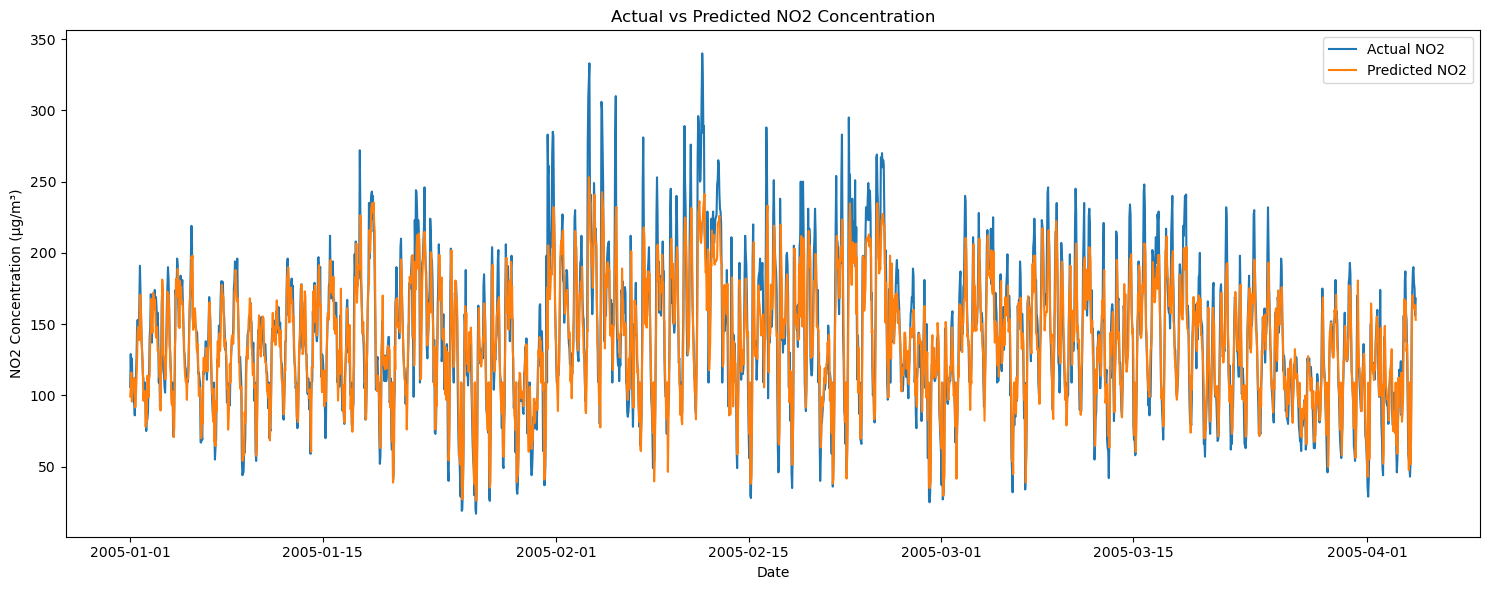

In [40]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test_full.index, y_test_full, label="Actual NO2")
# Predicted NO2
plt.plot(y_test_full.index, rf_y_predict_reduced, label="Predicted NO2")
y_test_full.values[:500]
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# # --------------------------
# # Time-aware train/test split
# # --------------------------
# train = D[:"2004-12-31"]
# test = D["2005-01-01":]

# X_train, X_test = train[rf_features_all], test[rf_features_all]
# y_train, y_test = train["NO2_t+1"], test["NO2_t+1"]

# --------------------------
# LightGBM Regressor
# --------------------------
lgb_model = lgb.LGBMRegressor(random_state=42)

# --------------------------
# Parameter Grid
# --------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'min_child_samples': [10, 20]
}



# --------------------------
# Time-aware Cross-validation
# --------------------------
tscv = TimeSeriesSplit(n_splits=3)

grid = GridSearchCV(
    lgb_model,
    param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',  # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

# grid.fit(X_train, y_train)
grid.fit(X_train_tree_reduced, y_train_full)


# --------------------------
# Evaluate on Test Set
# --------------------------
best_lgb_model = grid.best_estimator_
# lgb_y_pred = best_lgb_model.predict(X_test)
lgb_y_pred = best_lgb_model.predict(X_test_tree_reduced)


mae = mean_absolute_error(y_test_full, lgb_y_pred)
rmse = np.sqrt(mean_squared_error(y_test_full, lgb_y_pred))
r2 = r2_score(y_test_full, lgb_y_pred)

print("Best parameters:", grid.best_params_)
print("\nReduced LightGBM Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2241
[LightGBM] [Info] Number of data points in the train set: 6942, number of used features: 12
[LightGBM] [Info] Start training from score 103.076779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 50}

Reduced LightGBM Results:
MAE:  16.91
RMSE: 23.60
R²:   0.7832


In [ ]:
# Most recent:
# LightGBM Results:
# MAE:  16.80
# RMSE: 23.54
# R²:   0.7842

# LightGBM Results:
# MAE:  19.92
# RMSE: 27.52
# R²:   0.7052


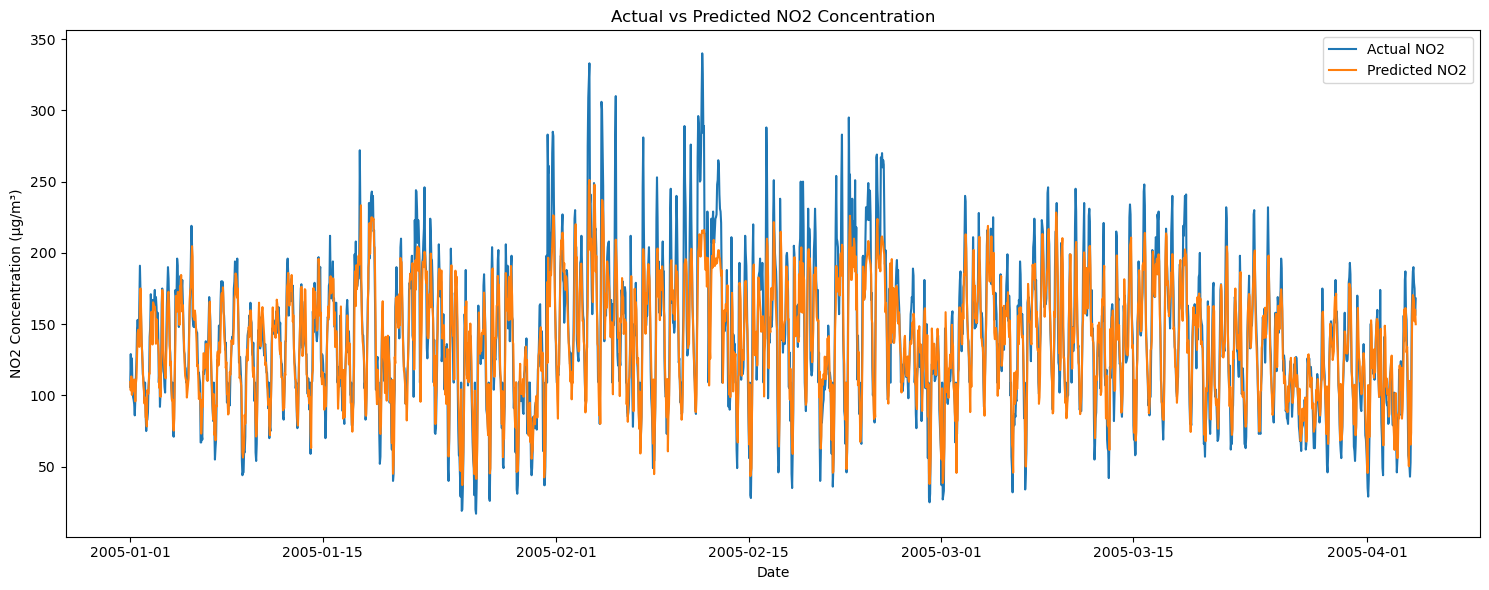

In [277]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test_full.index, y_test_full, label="Actual NO2")
# Predicted NO2
plt.plot(y_test_full.index, lgb_y_pred, label="Predicted NO2")
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

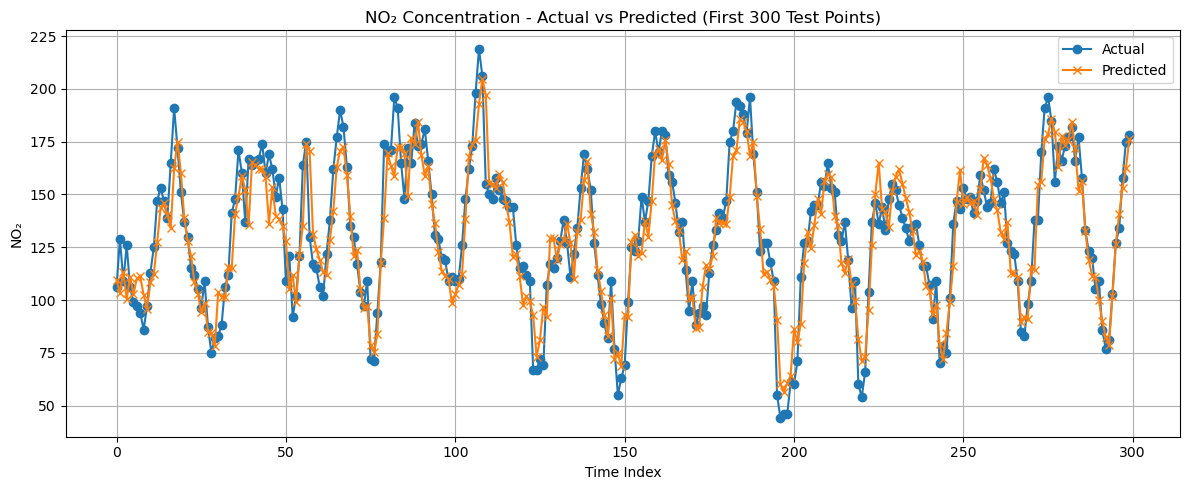

In [278]:
import matplotlib.pyplot as plt

# Plot first 100 predictions (or any subset)
plt.figure(figsize=(12, 5))
plt.plot(y_test_full.values[:300], label="Actual", marker='o')
plt.plot(lgb_y_pred[:300], label="Predicted", marker='x')
plt.title("NO₂ Concentration - Actual vs Predicted (First 300 Test Points)")
plt.xlabel("Time Index")
plt.ylabel("NO₂")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


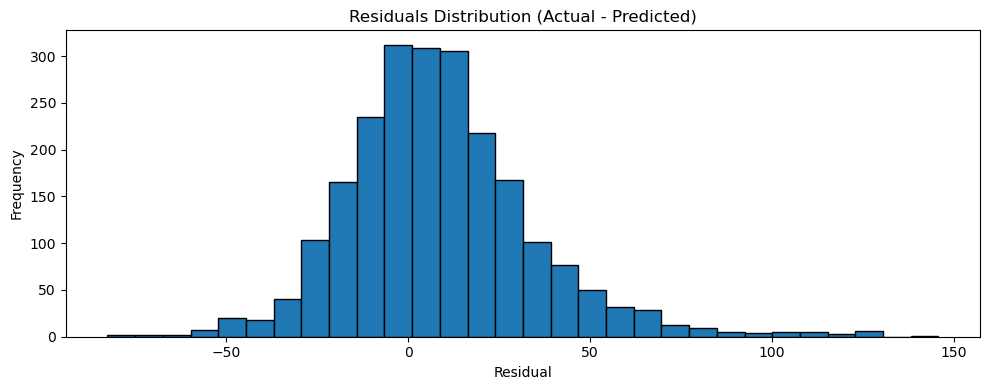

In [356]:
residuals = y_test.values - lgb_y_pred

plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# MISC Notes
These notes are just templates and scratch notes and might be deleted or changed in the future. For testing only. Safetly ignore anything below here

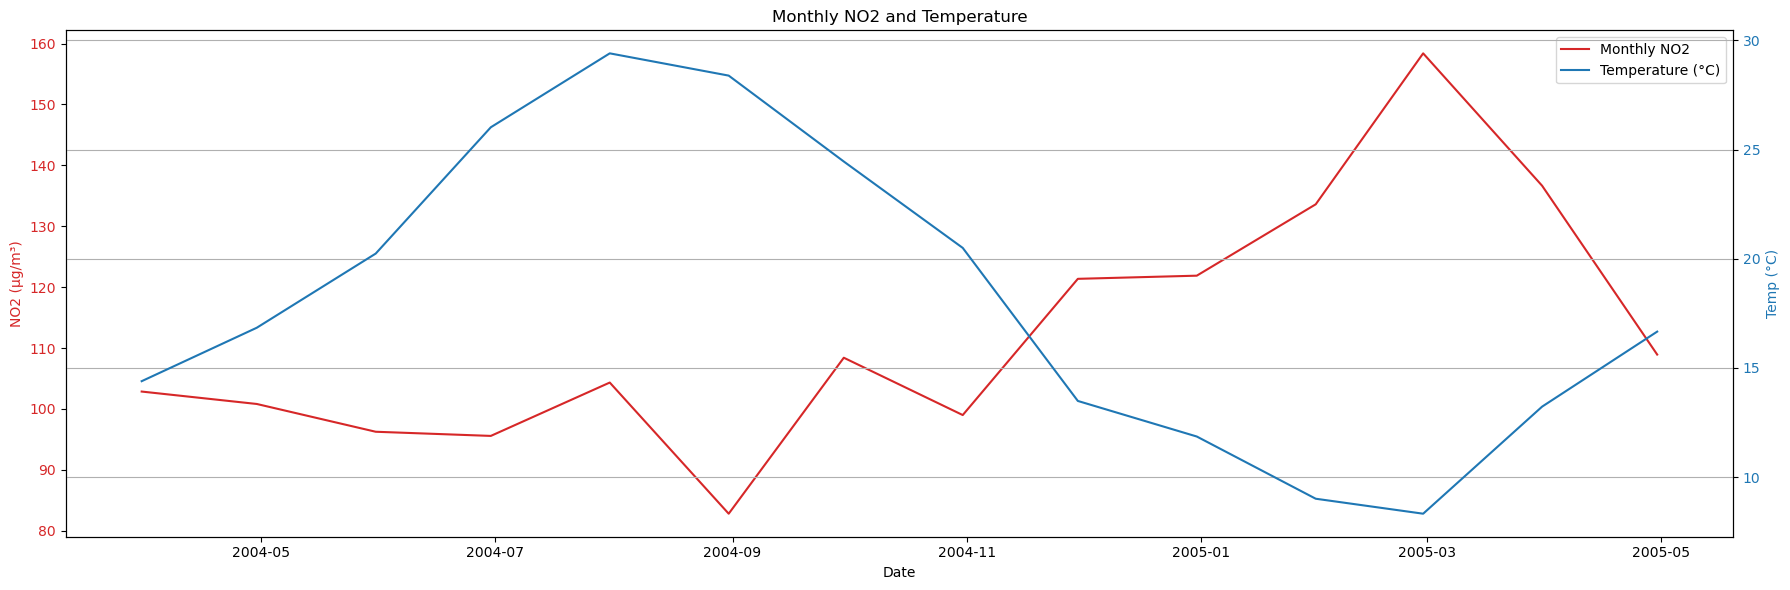

In [30]:
# Comparing Tempature with NO2
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot NO2 on left y-axis
ax1.plot(monthly_NO2.index, monthly_NO2, color="tab:red", label="Monthly NO2")
ax1.set_xlabel("Date")
ax1.set_ylabel("NO2 (µg/m³)", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Creates a second y-axis for temp
ax2 = ax1.twinx()
ax2.plot(monthly_temp.index, monthly_temp, color="tab:blue", label="Temperature (°C)")
ax2.set_ylabel("Temp (°C)", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Combines legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Monthly NO2 and Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

*fig X*: Shows the correlation between monthly NO2 concentration and Temperature, where NO2 rises when Temps drops in winter and vise versa

In [109]:
# Correct correlation on monthly averages
from scipy.stats import pearsonr, spearmanr

# Drop any months where either NO2 or Temp is NaN
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

# Pearson and Spearman on monthly means
pearson_corr, pearson_p = pearsonr(monthly_temp, monthly_NO2)
spearman_corr, spearman_p = spearmanr(monthly_temp, monthly_NO2)

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3g}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3g}")

Pearson correlation: -0.788, p-value: 0.000825
Spearman correlation: -0.815, p-value: 0.000379


A strong and statistically significant negative correlation was found between monthly average temperature and NO₂ concentrations (Pearson: -0.788, p = 0.0008). This confirms that the inverse relationship observed in the plot is not due to random variation but reflects a real seasonal pattern: higher temperatures are associated with lower NO₂ levels, and vice versa.

Temperature (T) and NO₂ concentration (NO2(GT)) have a statistically significant but weak negative correlation.<br>
the relationship (however small) is not due to random chance. Since the p-value is tiny we can be extremely confident the correlation isn't just noise. Thus there is a relationship between temperature and NO₂ levels in your dataset.<br>
But since the correlation's weak (the data points are not tightly clustered around a straight line); Temperature does influence NO₂, but it’s one of many factors and other variables like traffic, wind, season, emissions, etc., probably have stronger or additional effects. So, T and NO₂ are connected, but T alone doesn't explain NO₂ very well.

Prediction intervals<br>
Estimating uncertainty of future predictions<br>
More useful than CIs if your model is going to be used for real-world forecasting

In [ ]:
# Ground Truth vs sesnors comparisons
# Correlation heatmaps
# Time series trends of pollutants




# use cross validation (CV) to evaluate how well a predictive model generalizes to an unseen dataset.
# It helps assess the out-of-sample performance by simulating how the model would perform in real-world scenarios.

# What CV is used for:
# Model evaluation: Measure how well a model generalizes.

# Hyperparameter tuning: Choose parameters (e.g. depth of a decision tree) that yield the best average performance.

# Model selection: Compare different modeling approaches (e.g. logistic regression vs. random forest).

# Data preprocessing evaluation: Evaluate steps like imputation or scaling and see what works best.


# But importantly: You must impute only on the training fold, not the full dataset,
# or you'll leak future information into training → which leads to overfitting.

# Future project improvements is to integrate an API real time to predict future air pollutants from the
# Nasa API: https://api.nasa.gov/
# InSight: Mars Weather Service API